### Expand 2.5 studies to include 2020 data, clean all datasets, and determine states with highest and lowest levels of PM 2.5.

The EPA's current 24 hour standard for PM 2.5 is 35 µg/m3. Levels above this exceed the standard.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### Read in 1999, 2012, and 2020 PM2.5 dataset
pm0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_1999.csv') 
pm1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2012.csv') 
pm2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2020.csv') 

### Exploratory data analysis on 2020 dataset

In [3]:
#print summary info for the 2020 dataset as it wasn't done in the first PM2.5 studies notebook
print(pm2.info())
print(pm2.ndim) 
print(pm2.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554830 entries, 0 to 554829
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           554830 non-null  int64  
 1   County Code          554830 non-null  int64  
 2   Site Num             554830 non-null  int64  
 3   Parameter Code       554830 non-null  int64  
 4   POC                  554830 non-null  int64  
 5   Latitude             554830 non-null  float64
 6   Longitude            554830 non-null  float64
 7   Datum                554830 non-null  object 
 8   Parameter Name       554830 non-null  object 
 9   Sample Duration      554830 non-null  object 
 10  Pollutant Standard   311371 non-null  object 
 11  Date Local           554830 non-null  object 
 12  Units of Measure     554830 non-null  object 
 13  Event Type           554830 non-null  object 
 14  Observation Count    554830 non-null  int64  
 15  Observation Perce

In [77]:
#There are 554,830 rows and 29 columns. Because there are so many columns, look at the first five rows and first 10 columns
pm2.iloc[:5, :10]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR


In [78]:
#Look at the first five rows and next 9 columns
pm2.iloc[:5, 11:20]

,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
0,2020-01-01,Micrograms/cubic meter (LC),None,1,100.0,11.6,11.6,0,48.0
1,2020-01-04,Micrograms/cubic meter (LC),None,1,100.0,3.2,3.2,0,13.0
2,2020-01-07,Micrograms/cubic meter (LC),None,1,100.0,3.3,3.3,0,14.0
3,2020-01-10,Micrograms/cubic meter (LC),None,1,100.0,9.3,9.3,0,39.0
4,2020-01-13,Micrograms/cubic meter (LC),None,1,100.0,6.9,6.9,0,29.0


In [79]:
#Look at the first five rows and the final columns
pm2.iloc[:5, 21:]

,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
1,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
2,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
3,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
4,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21


In [7]:
pm2['Arithmetic Mean'].describe()

count    554830.000000
mean          8.159036
std          10.625555
min          -5.000000
25%           4.300000
50%           6.500000
75%           9.500000
max         824.104167
Name: Arithmetic Mean, dtype: float64

Since values should seemingly <b>not</b> be negative, I contacted the EPA via email to understand the negative values. I received this response: 

"Thanks for your message and reaching out. We have a short write up on acceptable values in EPA's Air Quality System (AQS) here: https://aqs.epa.gov/aqsweb/documents/about_aqs_data.html#_acceptable_values, but since that explanation is very short I can elaborate.

Every instrument has an allowable uncertainty, and occasionally as you've noted monitors can yield small negative hourly values. Say it's +/- 10 ppb for whatever substance. If the instrument reads 100 ppb, that means the real concentration will be somewhere between 90 and 110. If the instrument reads -3 that means the real value can be anywhere between 0 and 7 (negative concentrations not being possible). We allow reporting of the negative values to capture valid, quality assured readings that are valid members of the sample set. With PM2.5 monitors, negative hourly concentrations for PM2.5 down to -4.99 ug/m3 (the default QC range check) are used in computing 24-hour averages so as not to bias that average."

In [8]:
#Look into negative values in the 2012 dataset
pm1LessThan0 = pm1[pm1['Arithmetic Mean'] < 0]
pm1LessThan0

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
4018,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4042,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4063,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4065,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4175,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275005,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275006,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275012,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275063,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30


In [9]:
#Look into negative values in the 2012 dataset
pm2LessThan0 = pm2[pm2['Arithmetic Mean'] < 0]
pm2LessThan0

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
3809,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
3816,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
4163,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
4170,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
5564,2,110,4,88101,3,58.388497,-134.567237,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Floyd Dryden Middle School,3800 MENDENHALL LOOP ROAD,Alaska,Juneau,Juneau,"Juneau, AK",2021-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553629,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553633,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553634,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553635,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16


The 2012 dataset has 1130 negative sample values and the 2020 dataset has 2755 negative sample values

In [10]:
#sample duration stands out
print(pm1LessThan0.groupby('Sample Duration').size())
print(pm2LessThan0.groupby('Sample Duration').size())

Sample Duration
1 HOUR           606
24-HR BLK AVG    524
dtype: int64
Sample Duration
1 HOUR           1481
24-HR BLK AVG    1274
dtype: int64


In [11]:
#look at sample durations for all datasets
pm0SampleDuration = pm0.groupby('Sample Duration').size()
pm1SampleDuration = pm1.groupby('Sample Duration').size()
pm2SampleDuration = pm2.groupby('Sample Duration').size()
print(pm0SampleDuration)
print(pm1SampleDuration)
print(pm2SampleDuration)

Sample Duration
24 HOUR    103210
dtype: int64
Sample Duration
1 HOUR            85670
24 HOUR          107843
24-HR BLK AVG     83158
dtype: int64
Sample Duration
1 HOUR           243459
24 HOUR           72055
24-HR BLK AVG    239316
dtype: int64


The negative values in the 2012 and 2020 datasets were either 1 hour or 24-hour block averages. 

Text(0.5, 1.0, 'PM 2.5 Sample Durations by Dataset')

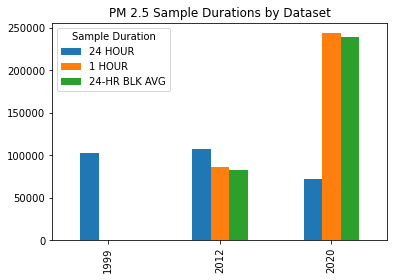

In [12]:
#Show bar chart of types of sample durations in 1999, 2012, and 2020
concatenatedSampleDurations = pd.concat([pm0SampleDuration, pm1SampleDuration, pm2SampleDuration], axis = 1, keys = ['1999', '2012', '2020'])
transposedSampleDurations = concatenatedSampleDurations.transpose()
fig = plt.figure
transposedSampleDurations.plot(kind = 'bar')
plt.title('PM 2.5 Sample Durations by Dataset')

In [13]:
plt.close()

It is clear that the trend is moving away from reporting of 24 hour samples only. Particularly in 2020, the number of 24 hour samples is far smaller than the number of 1 hour and 24-hour block average samples. Looking at the csv files, sites routinely had both 1 hour samples and 24-hr block averages on the same day. 

### Cleaning datasets

While looking at the csv file for the 2012 PM 2.5 data, I noticed there were results included for non U.S. states. 
Also, after re-reading the datafile descriptions, I will check whether there are any results for
excluded events. Thus, cleaning of datasets will include (1) removal of all 1 hour samples, (2) removal of excluded event observations, (3) removal of 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date, and (4) removal of non U.S. states.

#### 1999 dataset

In [24]:
len(pm0)

103210

In [14]:
#Previously accomplished, but repeated to keep together. Check for 1 hour samples.
pm0SampleDuration = pm0.groupby('Sample Duration').size()
pm0SampleDuration

Sample Duration
24 HOUR    103210
dtype: int64

In [15]:
#Check whether there are excluded observations in event type
pm0.groupby('Event Type').size()

Event Type
Included       597
None        102613
dtype: int64

In [17]:
#Check whether there are non U.S. states
pm0['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [18]:
len(pm0['State Name'].unique())

52

In [26]:
print(np.count_nonzero(pm0['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(pm0['State Name']== 'Puerto Rico'))
print(np.count_nonzero(pm0['State Name']== 'Virgin Islands' ))

667
1098
25


In [22]:
#remove observations from District Of Columbia, Puerto Rico, and Virgin Islands
pm0Cleaned = pm0[(pm0['State Name'] != 'District Of Columbia') & (pm0['State Name'] != 'Puerto Rico')
                 & (pm0['State Name'] != 'Virgin Islands')]

In [23]:
len(pm0Cleaned)

101420

In [140]:
#save cleaned dataset 
pm0Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Cleaned_datasets\\daily_88101_1999_cleaned.csv', header = True)

#### 2012 dataset

In [28]:
len(pm1)

276671

In [35]:
#Previously accomplished, but repeated to keep together. Check for 1 hour samples.
pm1SampleDuration = pm1.groupby('Sample Duration').size()
pm1SampleDuration

Sample Duration
1 HOUR            85670
24 HOUR          107843
24-HR BLK AVG     83158
dtype: int64

In [29]:
#remove 1 hour samples from 2012 dataset
pm1Non1HR = pm1[pm1['Sample Duration'] !=  '1 HOUR']
len(pm1Non1HR)

191001

In [34]:
#Check whether there are excluded observations in event type. 
pm1.groupby('Event Type').size()

Event Type
Excluded      2077
Included     31903
None        242691
dtype: int64

In [30]:
#remove excluded observations
pm1Non1HrNonExcluded = pm1Non1HR[pm1Non1HR['Event Type'] !=  'Excluded']
len(pm1Non1HrNonExcluded)

189973

In [117]:
pm1Non1HrNonExcludedSorted = pm1Non1HrNonExcluded.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])
#pm1Non1HrNonExcludedSorted

In [47]:
#remove 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date
pm1NonDuplicate = pm1Non1HrNonExcludedSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'],
            keep='first')
len(pm1NonDuplicate)

165133

In [36]:
#Check whether there are non U.S. states
pm1['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

In [37]:
len(pm1['State Name'].unique())

51

In [38]:
print(np.count_nonzero(pm1NonDuplicate['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(pm1NonDuplicate['State Name']== 'Puerto Rico'))
print(np.count_nonzero(pm1NonDuplicate['State Name']== 'Virgin Islands' ))

809
913
36


In [39]:
#remove observations from District Of Columbia, Puerto Rico, and Virgin Islands
pm1Cleaned = pm1NonDuplicate[(pm1NonDuplicate['State Name'] != 'District Of Columbia') 
                 & (pm1NonDuplicate['State Name'] != 'Puerto Rico')
                 & (pm1NonDuplicate['State Name'] != 'Virgin Islands')]

In [40]:
len(pm1Cleaned)

163375

In [141]:
#save cleaned dataset 
pm1Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Cleaned_datasets\\daily_88101_2012_cleaned.csv', header = True)

#### 2020 dataset

In [42]:
len(pm2)

554830

In [43]:
#Previously accomplished, but repeated to keep together. Check for 1 hour samples.
pm2SampleDuration = pm2.groupby('Sample Duration').size()
pm2SampleDuration

Sample Duration
1 HOUR           243459
24 HOUR           72055
24-HR BLK AVG    239316
dtype: int64

In [44]:
#remove 1 hour samples from 2020 dataset
pm2Non1HR = pm2[pm2['Sample Duration'] !=  '1 HOUR']
len(pm2Non1HR)

311371

In [45]:
#Check whether there are excluded observations in event type
pm2.groupby('Event Type').size()

Event Type
Excluded      1504
Included     20040
None        533286
dtype: int64

In [46]:
#remove excluded observations
pm2Non1HrNonExcluded = pm2Non1HR[pm2Non1HR['Event Type'] !=  'Excluded']
len(pm2Non1HrNonExcluded)

310614

In [49]:
#sort by state, county, site number, and date
pm2Non1HrNonExcludedSorted = pm2Non1HrNonExcluded.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])

In [50]:
#where duplicate dates occur for a given state code, county code, and site number, keep the first observation (24 hour)
pm2NonDuplicate = pm2Non1HrNonExcludedSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'], keep='first')
len(pm2NonDuplicate)

263391

In [51]:
#Check whether there are non U.S. states
pm2['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Virgin Islands', 'Country Of Mexico'], dtype=object)

In [52]:
len(pm2['State Name'].unique())

54

In [53]:
print(np.count_nonzero(pm2NonDuplicate['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(pm2NonDuplicate['State Name']== 'Puerto Rico'))
print(np.count_nonzero(pm2NonDuplicate['State Name']== 'Virgin Islands' ))
print(np.count_nonzero(pm2NonDuplicate['State Name']== 'Country Of Mexico' ))

1427
403
134
180


In [55]:
#remove observations from District Of Columbia, Puerto Rico, Virgin Islands, and Mexico
pm2Cleaned = pm2NonDuplicate[(pm2NonDuplicate['State Name'] != 'District Of Columbia') 
                 & (pm2NonDuplicate['State Name'] != 'Puerto Rico')
                 & (pm2NonDuplicate['State Name'] != 'Virgin Islands')
                 & (pm2NonDuplicate['State Name'] != 'Country Of Mexico')]

In [56]:
len(pm2Cleaned)

261247

In [142]:
#save cleaned csv
pm2Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Cleaned_datasets\\daily_88101_2020_cleaned.csv', header = True)

### Extract arithmetic mean columns from datasets and print descriptive statistics

Original (uncleaned) and cleaned datasets

In [26]:
#uncleaned 1999
x0 = pm0['Arithmetic Mean']
x0.describe()

count    103210.000000
mean         13.776391
std           9.425582
min           0.000000
25%           7.200000
50%          11.500000
75%          17.900000
max         157.100000
Name: Arithmetic Mean, dtype: float64

In [59]:
#cleaned 1999 
x0_cleaned = pm0Cleaned['Arithmetic Mean']
x0_cleaned.describe()

count    101420.000000
mean         13.814669
std           9.453117
min           0.000000
25%           7.200000
50%          11.600000
75%          18.000000
max         157.100000
Name: Arithmetic Mean, dtype: float64

In [60]:
#uncleaned 2012
x1 = pm1['Arithmetic Mean']
x1.describe()

count    276671.000000
mean          9.141456
std           6.520117
min          -6.312500
25%           5.100000
50%           7.916667
75%          11.700000
max         236.254167
Name: Arithmetic Mean, dtype: float64

In [61]:
#cleaned 2012
x1_cleaned = pm1Cleaned['Arithmetic Mean']
x1_cleaned.describe()

count    163375.000000
mean          9.092652
std           6.266262
min          -3.500000
25%           5.200000
50%           7.900000
75%          11.600000
max         236.200000
Name: Arithmetic Mean, dtype: float64

In [62]:
#uncleaned 2020
x2 = pm2['Arithmetic Mean']
x2.describe()

count    554830.000000
mean          8.159036
std          10.625555
min          -5.000000
25%           4.300000
50%           6.500000
75%           9.500000
max         824.104167
Name: Arithmetic Mean, dtype: float64

In [63]:
#cleaned 2020
x2_cleaned = pm2Cleaned['Arithmetic Mean']
x2_cleaned.describe()

count    261247.000000
mean          8.093487
std          10.731828
min          -4.900000
25%           4.300000
50%           6.500000
75%           9.400000
max         824.100000
Name: Arithmetic Mean, dtype: float64

### Compare changes in numbers of PM2.5 test sites

In [ ]:
#MAY NEED THIS IF COMPARING SPECIFIC TEST SITES OR NEED TO KNOW HOW MANY TEST SITES PER STATE

In [138]:
pm0Sites = pm0Cleaned[['State Name', 'County Name', 'Site Num']].groupby('State Name').agg(['count', 'nunique'])
pm0Sites

County Name         Site Num        
                     count nunique    count nunique
State Name                                         
Alabama               2746      15     2746      15
Alaska                 452       5      452       6
Arizona               1864       7     1864      12
Arkansas               773      15      773       8
California            8330      41     8330      35
Colorado              1129      11     1129      11
Connecticut           1359       4     1359      10
Delaware              1126       3     1126       8
Florida               4711      19     4711      25
Georgia               2722      16     2722      15
Hawaii                 851       2      851       5
Idaho                  870       9      870       9
Illinois              1389      13     1389      24
Indiana               3564      15     3564      28
Iowa                  1369      11     1369      15
Kansas                1321       6     1321       9
Kentucky              2541      17     2541      14
Louisiana             2473      12     2473      10
Maryland               543       8      543      15
Massachusetts         2485      10     2485      18
Michigan              2953      16     2953      16
Minnesota              812      12      812      21
Mississippi           1471      15     1471       9
Missouri              2846      13     2846      17
Montana                784       6      784       8
Nebraska               964      11      964       9
Nevada                 943       3      943       6
New Hampshire          637       7      637       8
New Jersey            1669      12     1669      14
New Mexico            1471       8     1471      10
New York              1648      19     1648      27
North Carolina        4830      29     4830      17
North Dakota           457       6      457       5
Ohio                  6422      18     6422      29
Oklahoma              1175      15     1175      19
Oregon                3975      15     3975      26
Pennsylvania          3850      18     3850      32
Rhode Island           909       3      909       7
South Carolina        2574      13     2574      13
South Dakota           716       3      716       8
Tennessee             2478      14     2478      20
Texas                 2203      16     2203      36
Utah                  1655       5     1655       9
Vermont                578       4      578       4
Virginia              2141      17     2141      16
Washington            3056      12     3056      23
West Virginia         1753      12     1753      11
Wisconsin             3366      18     3366      22
Wyoming                466       4      466       6

In [137]:
pm0Grouped = pm0Cleaned.groupby(['State Name', 'County Name']).agg({'Site Num': ['count', 'nunique']})
type(pm0Grouped)
pm0Grouped.columns
pm0Grouped.head()
pm0GroupedbyState = pm0Grouped.reset_index()
pm0GroupedbyState.head()
pm0GroupedAlabama = pm0GroupedbyState[pm0GroupedbyState['State Name'] == 'Alabama']
pm0GroupedAlabama

State Name County Name Site Num        
                             count nunique
0     Alabama        Clay       94       1
1     Alabama     Colbert       82       1
2     Alabama      DeKalb      105       1
3     Alabama     Houston       71       1
4     Alabama   Jefferson     1183       5
5     Alabama     Madison      112       1
6     Alabama      Mobile      273       2
7     Alabama  Montgomery      160       1
8     Alabama      Morgan       92       1
9     Alabama     Russell       98       1
10    Alabama      Shelby       82       1
11    Alabama      Sumter       96       1
12    Alabama   Talladega      103       1
13    Alabama  Tuscaloosa      107       1
14    Alabama      Walker       88       1

In [139]:
pm0GroupedCalifornia = pm0GroupedbyState[pm0GroupedbyState['State Name'] == 'California']
pm0GroupedCalifornia

State Name      County Name Site Num        
                                   count nunique
42  California          Alameda       84       2
43  California            Butte       59       1
44  California        Calaveras       59       1
45  California           Colusa       85       1
46  California     Contra Costa      109       1
47  California        El Dorado      118       1
48  California           Fresno      422       2
49  California         Humboldt       59       1
50  California         Imperial      273       3
51  California             Inyo      110       1
52  California             Kern      556       4
53  California            Kings       44       1
54  California             Lake       47       1
55  California      Los Angeles     1012       9
56  California        Mendocino      115       1
57  California           Merced       53       1
58  California            Modoc       56       1
59  California         Monterey      102       1
60  California           Nevada      113       2
61  California           Orange      180       2
62  California           Placer       59       1
63  California           Plumas      119       2
64  California        Riverside      344       3
65  California       Sacramento      540       3
66  California   San Bernardino      532       5
67  California        San Diego     1053       5
68  California    San Francisco      170       1
69  California      San Joaquin      117       1
70  California  San Luis Obispo      170       2
71  California        San Mateo       68       1
72  California    Santa Barbara       37       2
73  California      Santa Clara      285       2
74  California       Santa Cruz      185       1
75  California           Shasta       57       1
76  California           Solano       60       1
77  California           Sonoma       69       1
78  California       Stanislaus      117       1
79  California           Sutter      111       1
80  California           Tulare      117       1
81  California          Ventura      366       3
82  California             Yolo       98       1

In [115]:
pm1Sites = pm1Cleaned[['State Name', 'County Name', 'Site Num']].groupby('State Name').agg(['count', 'nunique'])
pm1Sites

County Name         Site Num        
                     count nunique    count nunique
State Name                                         
Alabama               2183      15     2183      14
Alaska                3206       5     3206      11
Arizona               3674      10     3674      21
Arkansas              1708      12     1708       9
California           24944      45    24944      54
Colorado              2382      14     2382      16
Connecticut           1757       5     1757      10
Delaware              1131       3     1131       7
Florida               4108      17     4108      24
Georgia               4470      20     4470      15
Hawaii                3933       4     3933      12
Idaho                 1333       4     1333       4
Indiana               7280      21     7280      24
Iowa                  4462      14     4462      16
Kansas                1199       6     1199       8
Kentucky              2634      15     2634      15
Louisiana             2382      12     2382      10
Maryland              3711      11     3711      13
Massachusetts         2058       8     2058      15
Michigan              3967      19     3967      21
Minnesota             3798      11     3798      16
Mississippi            182       1      182       1
Missouri              3743       9     3743      10
Montana               4001      11     4001      11
Nebraska              1237       6     1237       6
Nevada                1389       2     1389       6
New Hampshire         1820       6     1820       8
New Jersey            3562      13     3562      14
New Mexico            1166       5     1166       7
New York              2290      15     2290      17
North Carolina        5160      30     5160      20
North Dakota          2527       8     2527       4
Ohio                  5966      22     5966      33
Oklahoma              1369       5     1369       6
Oregon                1519      11     1519      14
Pennsylvania         11827      25    11827      31
Rhode Island          1348       3     1348       6
South Carolina        2232       8     2232      11
South Dakota          2953       8     2953       8
Tennessee             2062       2     2062       8
Texas                 2616      12     2616      20
Utah                  3580      10     3580      11
Vermont                456       3      456       4
Virginia              3063      18     3063      15
Washington            3459       9     3459      13
West Virginia         1643      12     1643       9
Wisconsin             2449      16     2449      15
Wyoming               3436      11     3436      20

In [116]:
pm2Sites = pm2Cleaned[['State Name', 'County Name', 'Site Num']].groupby('State Name').agg(['count', 'nunique'])
pm2Sites

County Name         Site Num        
                     count nunique    count nunique
State Name                                         
Alabama               2181      11     2181      13
Alaska                2033       4     2033       6
Arizona               5902       7     5902      19
Arkansas              1441       9     1441       8
California           33724      46    33724      63
Colorado              5615      13     5615      16
Connecticut           2884       5     2884       8
Delaware              1905       3     1905       8
Florida               7937      16     7937      25
Georgia               5063      18     5063      12
Hawaii                4262       4     4262      13
Idaho                 1831       7     1831       5
Illinois              7132      17     7132      32
Indiana               8742      23     8742      25
Iowa                  3599      13     3599      14
Kansas                2340       7     2340       6
Kentucky              5491      14     5491      15
Louisiana             2008      13     2008      10
Maine                 2577       7     2577      10
Maryland              3915      11     3915      10
Massachusetts         5447      11     5447      15
Michigan              5391      16     5391      18
Minnesota             7468      17     7468      21
Mississippi           2866       7     2866       7
Missouri              4561       9     4561      12
Montana               5304      13     5304      14
Nebraska              1648       6     1648       8
Nevada                5531       4     5531      16
New Hampshire         2057       5     2057       6
New Jersey            4628      15     4628      16
New Mexico            4091       5     4091      11
New York              3548      14     3548      17
North Carolina        7466      18     7466      16
North Dakota          3220       9     3220       4
Ohio                  8474      23     8474      33
Oklahoma              4370      11     4370      14
Oregon                2203       9     2203      12
Pennsylvania         15013      32    15013      37
Rhode Island          1875       3     1875       6
South Carolina        3047       9     3047      11
South Dakota          3237       9     3237       7
Tennessee             6672      16     6672      22
Texas                12550      26    12550      39
Utah                  5792      10     5792      14
Vermont               1437       3     1437       4
Virginia              3900      17     3900      17
Washington            6164      12     6164      18
West Virginia         1736      11     1736      10
Wisconsin             6830      16     6830      14
Wyoming               4139      11     4139      16

### Compare aggregate changes in PM2.5 for years 1999, 2012, and 2020

Text(0, 0.5, 'sample values in µg/m3')

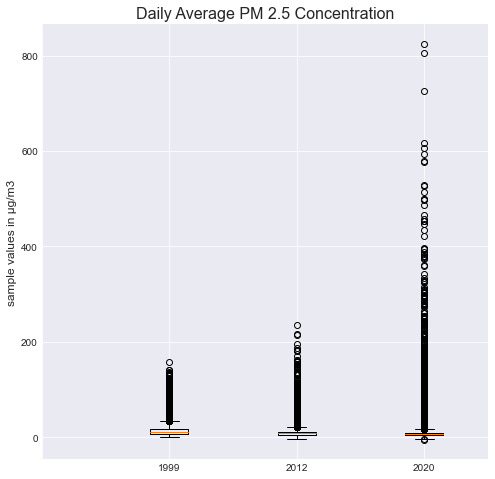

In [64]:
#make boxplots
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = [8, 8]) #make larger

years = [x0_cleaned, x1_cleaned, x2_cleaned]
plt.boxplot(years)
plt.title('Daily Average PM 2.5 Concentration', fontsize=16)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('sample values in µg/m3', fontsize=12)

In [30]:
plt.close()

Text(0, 0.5, 'sample values in µg/m3')

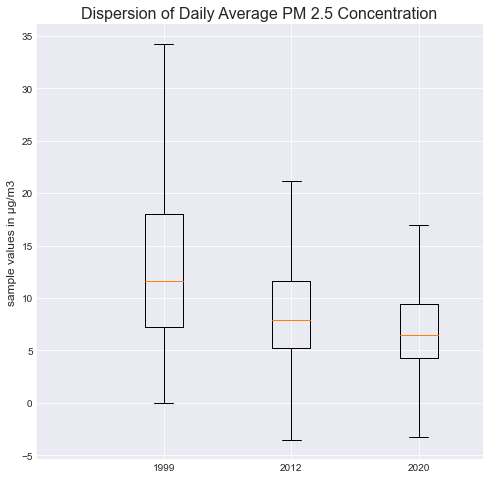

In [65]:
#re-plot arithmetic means for 1999, 2012, and 2020 removing the outliers
fig1 = plt.figure(figsize = [8, 8]) #make larger

years = [x0_cleaned, x1_cleaned, x2_cleaned]
plt.boxplot(years, showfliers = False)
plt.title('Dispersion of Daily Average PM 2.5 Concentration', fontsize=16)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('sample values in µg/m3', fontsize=12)

In [32]:
plt.close()

Text(0.5, 0, '')

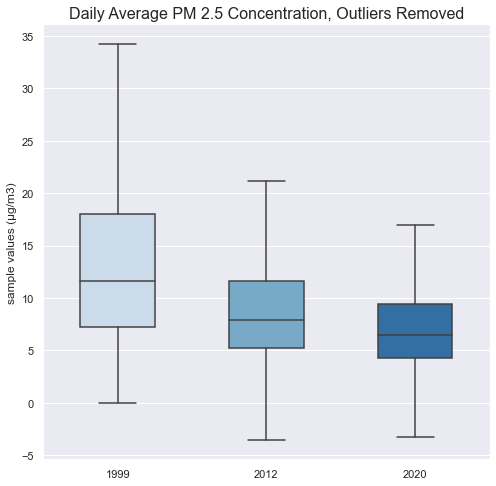

In [66]:
#Use seaborn for boxplots and remove outliers
#Create separate dataframes for arithmetic year series, add a year column and combine dataframes
#Code modified from https://stackoverflow.com/questions/42004381/box-plot-of-a-many-pandas-dataframes
df0 = pd.DataFrame(x0_cleaned.to_frame()).assign(Year=1999)
df1 = pd.DataFrame(x1_cleaned.to_frame()).assign(Year=2012)
df2 = pd.DataFrame(x2_cleaned.to_frame()).assign(Year=2020)
cdf = pd.concat([df0, df1, df2])
sns.set(rc={'figure.figsize': (8,8)})
ax = sns.boxplot(x="Year", y="Arithmetic Mean", data=cdf, width = 0.5, palette='Blues', showfliers = False)  
ax.set_title('Daily Average PM 2.5 Concentration, Outliers Removed', fontsize=16)
ax.set_ylabel('sample values (µg/m3)')
ax.set_xlabel('')

In [67]:
plt.close()

## How have state levels of PM 2.5 changed over time?

In [91]:
#calculate the PM for each state in 1999, 2012, and 2020
mn0 = pm0Cleaned['Arithmetic Mean'].groupby(pm0Cleaned['State Name']).mean()
mn1 = pm1Cleaned['Arithmetic Mean'].groupby(pm1Cleaned['State Name']).mean()
mn2 = pm2Cleaned['Arithmetic Mean'].groupby(pm2Cleaned['State Name']).mean()

In [92]:
#Make separate data frames for states / years
d0 = pd.DataFrame(mn0.to_frame().reset_index())
d0.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
d1 = pd.DataFrame(mn1.to_frame().reset_index())
d1.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg = pd.merge(d0, d1, on = 'State Name')

[Text(1, 0, '1999'), Text(3, 0, '2012')]

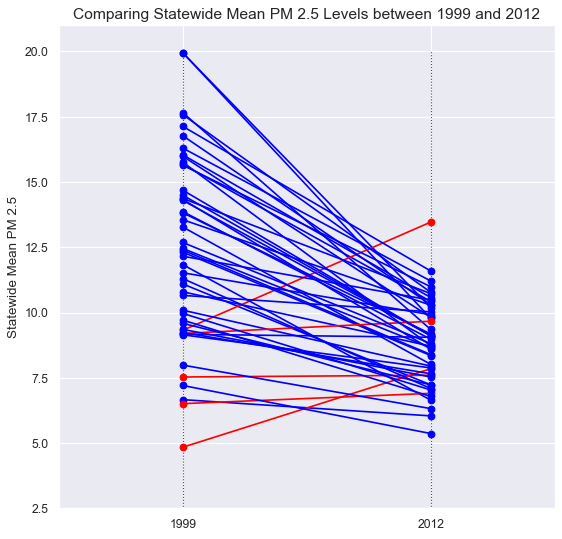

In [93]:
#This is a repeat of the analysis done in PM2.5 studies; however, the 1999 and 2012 datasets were cleaned in this study
#Code for this plot was modified from slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg['Mean_x'], x=np.repeat(1, mrg.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg['Mean_y'], x=np.repeat(3, mrg.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(mrg['Mean_x'], mrg['Mean_y'], mrg['State Name']):
    newline([1,p1], [3,p2])
    
# Decoration
ax.set_title("Comparing Statewide Mean PM 2.5 Levels between 1999 and 2012", fontsize=14)
ax.set(xlim=(0,4), ylim=(2.5,21), ylabel='Statewide Mean PM 2.5')
ax.set_xticks([1,3])
ax.set_xticklabels(["1999", "2012"])

In [94]:
plt.close()

In [95]:
#Add 2020 dataset and re-plot changes between 2012 and 2020
d2 = pd.DataFrame(mn2.to_frame().reset_index())
d2.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg1 = pd.merge(mrg, d2, on = 'State Name')

[Text(1, 0, '2012'), Text(3, 0, '2020')]

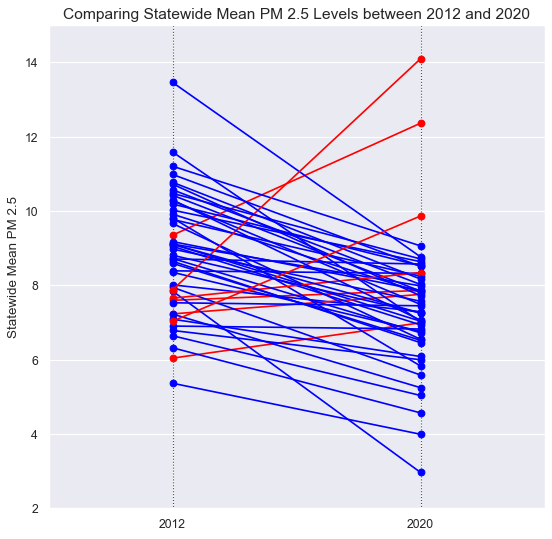

In [96]:
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')



# Points
#ax.scatter(y=mrg1['Mean_x'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Mean_y'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Mean'], x=np.repeat(3, mrg1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip( mrg1['Mean_y'], mrg1['Mean'], mrg1['State Name']):
    newline([1,p1], [3,p2] )
    
# Decoration
ax.set_title("Comparing Statewide Mean PM 2.5 Levels between 2012 and 2020", fontsize=14)
ax.set(xlim=(0,4), ylim=(2,15), ylabel='Statewide Mean PM 2.5')
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2020'])

In [97]:
plt.close()

### Which states have the highest levels of PM2.5?

In [98]:
d0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State Name  49 non-null     object 
 1   Mean        49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [99]:
d0TopTen = d0.sort_values('Mean', ascending = False).head(10)
d0TopTen

,State Name,Mean
0,Alabama,19.951238
9,Georgia,19.943240
4,California,17.653481
33,Ohio,17.578823
40,Tennessee,17.129217
46,West Virginia,16.769652
12,Illinois,16.724550
22,Mississippi,16.297349
16,Kentucky,16.039906
18,Maryland,15.985083


Text(0.5, 1.0, '1999 Highest Concentrations of PM 2.5')

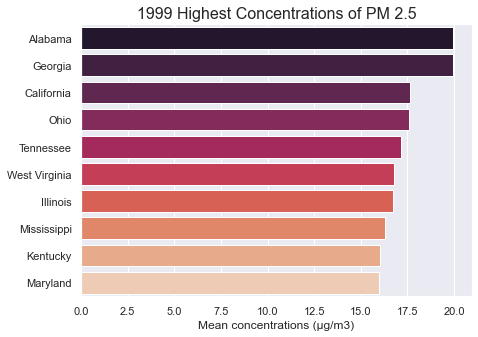

In [100]:
#create barplots
sns.set(rc={'figure.figsize': (7,5)})
sns.barplot(x = d0TopTen['Mean'], y = d0TopTen['State Name'], palette = 'rocket')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('1999 Highest Concentrations of PM 2.5', fontsize=16)

In [101]:
plt.close()

In [102]:
#repeat top ten visualizations for years 2012 and 2020
d1TopTen = d1.sort_values('Mean', ascending = False).head(10)
d1TopTen

,State Name,Mean
11,Idaho,13.464291
39,Tennessee,11.590931
21,Mississippi,11.207692
12,Indiana,10.987102
32,Ohio,10.775360
35,Pennsylvania,10.724850
15,Kentucky,10.573842
40,Texas,10.477064
3,Arkansas,10.427459
45,West Virginia,10.301948


Text(0.5, 1.0, '2012 Highest Concentrations of PM 2.5')

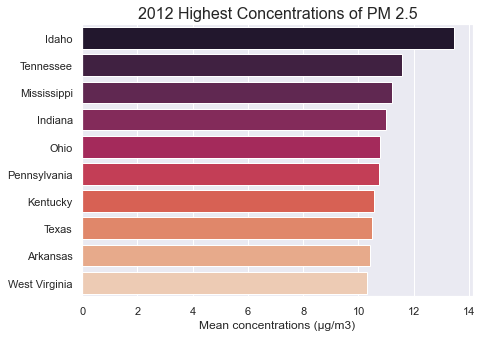

In [103]:
sns.barplot(x = d1TopTen['Mean'], y = d1TopTen['State Name'], palette = 'rocket')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('2012 Highest Concentrations of PM 2.5', fontsize=16)

In [104]:
plt.close()

In [105]:
d2TopTen = d2.sort_values('Mean', ascending = False).head(10)
d2TopTen

,State Name,Mean
36,Oregon,14.096686
4,California,12.364399
46,Washington,9.867813
23,Mississippi,9.063922
11,Idaho,8.768651
42,Texas,8.712135
35,Oklahoma,8.639519
12,Illinois,8.626991
2,Arizona,8.575415
9,Georgia,8.529172


Text(0.5, 1.0, '2020 Highest Concentrations of PM 2.5')

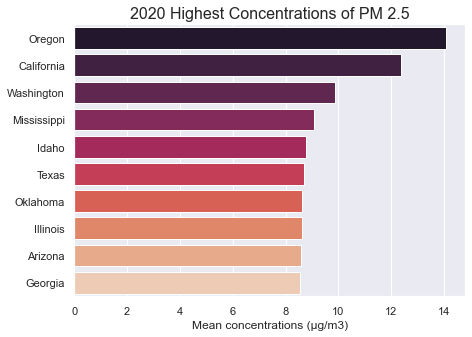

In [106]:
sns.barplot(x = d2TopTen['Mean'], y = d2TopTen['State Name'], palette = 'rocket')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('2020 Highest Concentrations of PM 2.5', fontsize=16)

In [107]:
plt.close()

### Which states have the lowest levels of PM2.5?

Text(0.5, 1.0, '1999 Lowest Concentrations of PM 2.5')

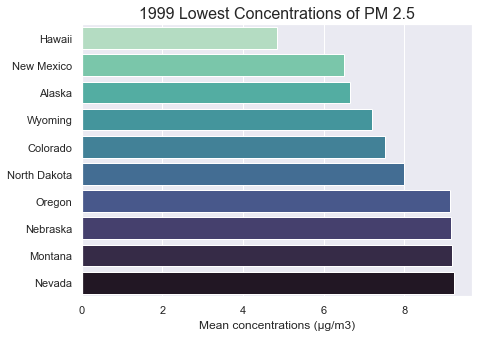

In [108]:
d0LowestTen = d0.sort_values('Mean').head(10)
sns.barplot(x = d0LowestTen['Mean'], y = d0LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('1999 Lowest Concentrations of PM 2.5', fontsize=16)

In [109]:
plt.close()

Text(0.5, 1.0, '2012 Lowest Concentrations of PM 2.5')

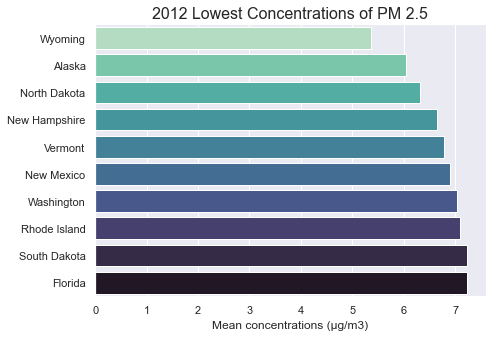

In [110]:
d1LowestTen = d1.sort_values('Mean').head(10)
sns.barplot(x = d1LowestTen['Mean'], y = d1LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('2012 Lowest Concentrations of PM 2.5', fontsize=16)

In [111]:
plt.close()

Text(0.5, 1.0, '2020 Lowest Concentrations of PM 2.5')

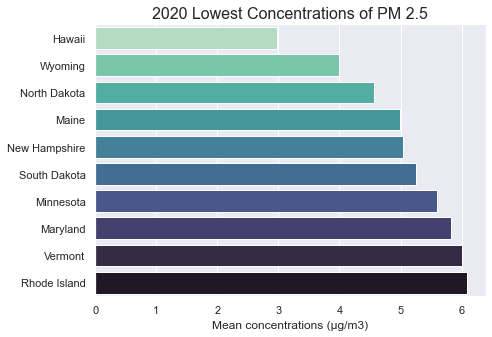

In [112]:
d2LowestTen = d2.sort_values('Mean').head(10)
sns.barplot(x = d2LowestTen['Mean'], y = d2LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('2020 Lowest Concentrations of PM 2.5', fontsize=16)

In [113]:
plt.close()

### End PM2.5 studies